In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


# Performing decision tree without binning:

In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:

accuracy_score(y_test,y_pred)

0.6293706293706294

In [34]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6275039123630674)

# Applying binning:

In [36]:
# creating kbin_age class for age and kbin_fare class for fare. we could have created a single class but we prefered two differnt so as we change the strategyu argument accordingly on our own
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [37]:
#passing age column to kbin_age discretizer to apply
#passing fare column to kbin_fare discretizer to apply
#finally creating the transformer object to be applied
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [38]:
#applying the transform to X_train data
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

D:\Complete Machine Learning with python\ml-env\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
D:\Complete Machine Learning with python\ml-env\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [39]:
#checking no. of bins formned
trf.named_transformers_['first'].n_bins_

array([10])

In [40]:
#checking the interval of the bins formed
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [41]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [42]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [43]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
97,23.0,3.0,63.3583,8.0,"(22.0, 25.0]","(51.479, 82.171]"
318,31.0,5.0,164.8667,9.0,"(28.5, 32.0]","(82.171, 512.329]"
566,19.0,2.0,7.8958,2.0,"(14.0, 19.0]","(7.75, 7.896]"
175,18.0,1.0,7.8542,1.0,"(14.0, 19.0]","(7.75, 7.896]"
232,59.0,9.0,13.5000,4.0,"(50.0, 80.0]","(13.0, 15.75]"


# Performing decision tree with binning:

In [44]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [45]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [46]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

D:\Complete Machine Learning with python\ml-env\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
D:\Complete Machine Learning with python\ml-env\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


np.float64(0.6331181533646323)

In [48]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6275234741784036


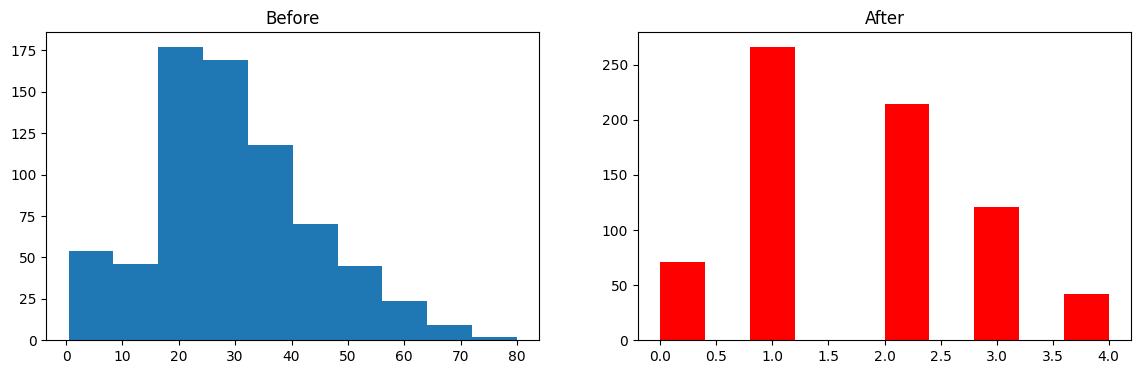

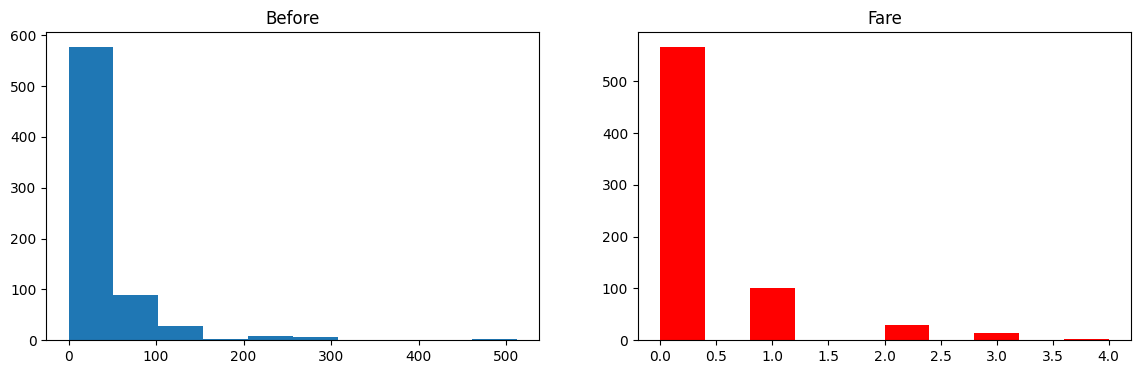

In [49]:

discretize(5,'kmeans')


D:\Complete Machine Learning with python\ml-env\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
D:\Complete Machine Learning with python\ml-env\lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


0.6331572769953052


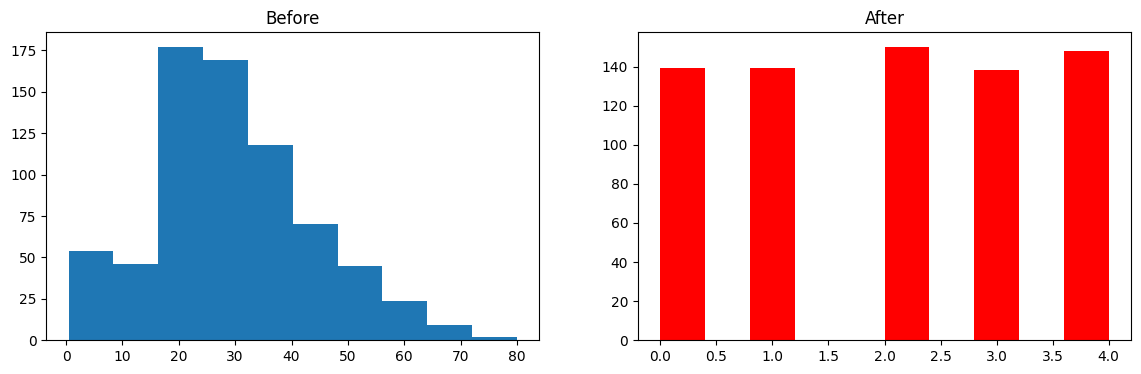

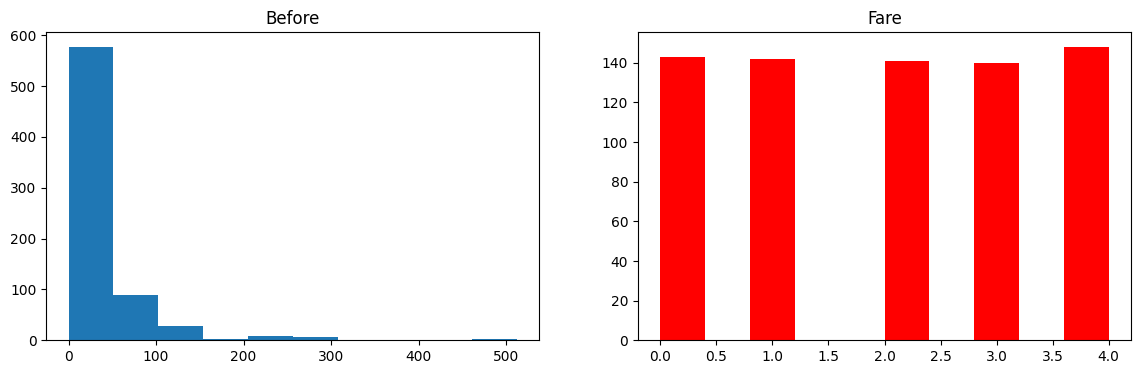

In [50]:

discretize(5,'quantile')


0.6330790297339594


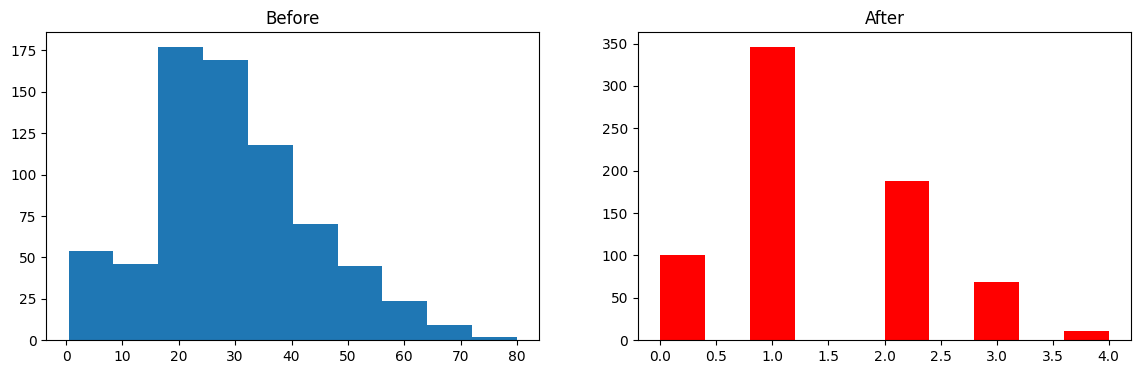

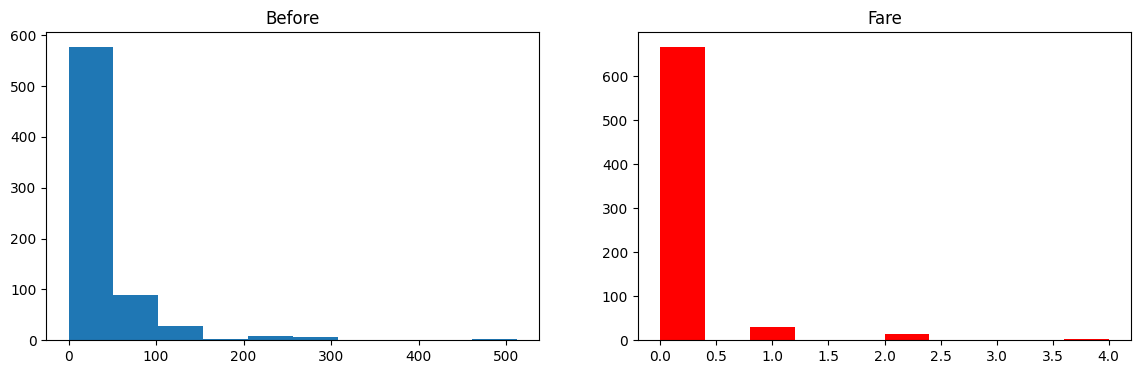

In [52]:

discretize(5,'uniform')
